<a href="https://colab.research.google.com/github/sdesuzane/data_science-Alura/blob/introduction/Introducao_a_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd

In [40]:
notas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/ratings.csv")
notas

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [41]:
notas["rating"].unique() # valores unicos

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [42]:
notas["rating"].value_counts() # contando os valores de cada nota

,count
rating,
4.0,26818
3.0,20047
5.0,13211
3.5,13136
4.5,8551
2.0,7551
2.5,5550
1.0,2811
1.5,1791


<Axes: ylabel='Frequency'>

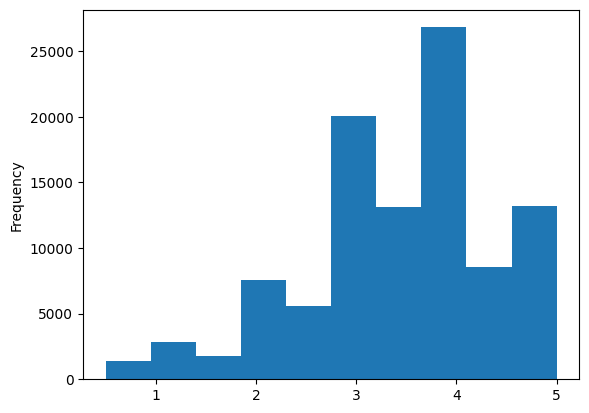

In [43]:
notas["rating"].plot(kind='hist')

In [44]:
import seaborn as sns

<Axes: ylabel='rating'>

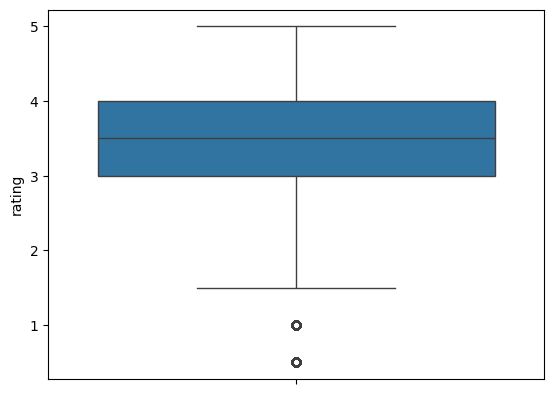

In [45]:
sns.boxplot(notas["rating"]) # notas 25% 50% 75% (mediana 3,5)

In [46]:
# criando um dataframe

dados = {'nome': ["Suzane", "Felipe", "Odin"],
         'idade':[27, 30, 6],
         'profissao':["Estudante", "Engenheiro de dados", "au au"]}
df = pd.DataFrame(dados)
df

,nome,idade,profissao
0,Suzane,27,Estudante
1,Felipe,30,Engenheiro de dados
2,Odin,6,au au


In [47]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/refs/heads/main/Aula_2.1/movies.csv")
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [48]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [49]:
notas.query("movieId==1")["rating"].mean() # media das notas de todos os filmes com ID == 1

3.9209302325581397

In [50]:
media_por_filmes = notas.groupby("movieId")["rating"].mean() # media das nota agrupados por filmes
media_por_filmes.head()

,rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


<Axes: ylabel='Frequency'>

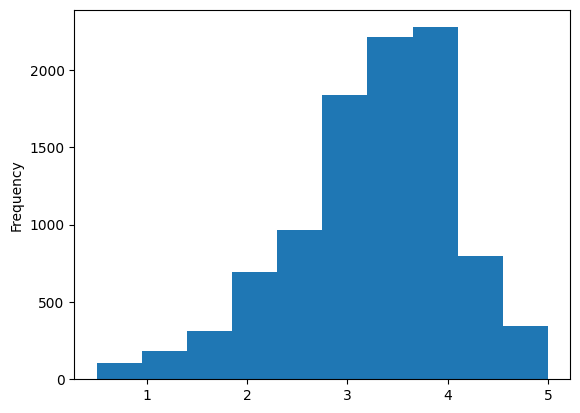

In [51]:
media_por_filmes.plot(kind="hist")

In [52]:
join = notas.join(filmes, lsuffix= '_notas', rsuffix='_filmes')
join

,userId,movieId_notas,rating,timestamp,movieId_filmes,title,genres
0,1,1,4.0,964982703,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,2.0,Jumanji (1995),Adventure|Children|Fantasy
2,1,6,4.0,964982224,3.0,Grumpier Old Men (1995),Comedy|Romance
3,1,47,5.0,964983815,4.0,Waiting to Exhale (1995),Comedy|Drama|Romance
4,1,50,5.0,964982931,5.0,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,NaN,NaN,NaN
100832,610,168248,5.0,1493850091,NaN,NaN,NaN
100833,610,168250,5.0,1494273047,NaN,NaN,NaN
100834,610,168252,5.0,1493846352,NaN,NaN,NaN


In [53]:
media_notas = join.query("rating > 3.0 and title == 'Toy Story (1995)'")
media_notas

,userId,movieId_notas,rating,timestamp,movieId_filmes,title,genres
0,1,1,4.0,964982703,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


<Axes: ylabel='rating'>

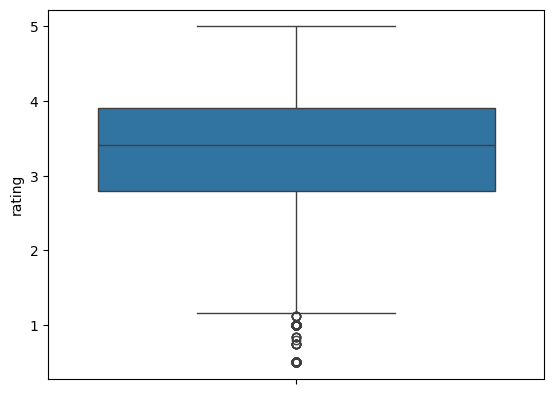

In [54]:
sns.boxplot(media_por_filmes)

In [55]:
media_por_filmes.describe()

,rating
count,9724.000000
mean,3.262448
std,0.869874
min,0.500000
25%,2.800000
50%,3.416667
75%,3.911765
max,5.000000


Text(0.5, 1.0, 'Histograma das médias dis filmes')

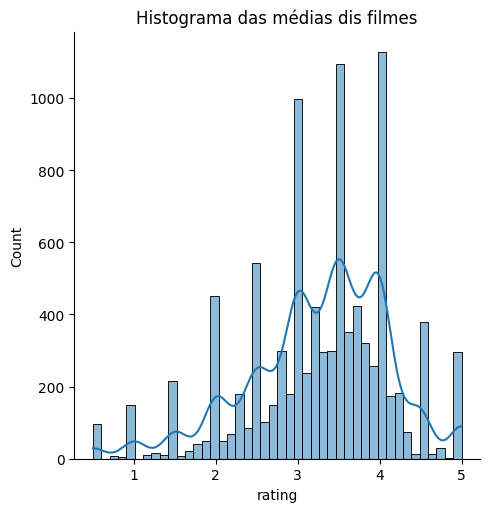

In [56]:
import matplotlib.pyplot as plt

sns.displot(media_por_filmes, kde=True) # desenhar curva
plt.title("Histograma das médias dis filmes") # altera o grafico atual